# Diabetic Retinopathy Detection
#### Rapid Screening and Early diagnosis of Disease Retinopathy using Scanned Retinal images and underlying Deep Learning models.

### What is Diabetic Retinopathy?
Diabetic retinopathy is a diabetes-related complication that affects the eyes. It is a condition in which high blood sugar levels damage the blood vessels in the retina, the light-sensitive tissue at the back of the eye. The retina is essential for vision, as it sends visual signals to the brain.

The damage to the blood vessels in diabetic retinopathy can lead to various eye problems, including:

1. **Swelling of the macula (macular edema):** The macula is the central part of the retina responsible for sharp, detailed vision. Swelling in this area can cause blurred or distorted vision.

2. **Formation of new blood vessels (neovascularization):** In some cases, the damaged blood vessels prompt the growth of new, fragile blood vessels. These new vessels can leak blood into the eye, leading to vision problems and even causing scarring in the retina.

3. **Changes to the retina:** The blood vessels in the retina may become blocked, depriving the retinal tissue of oxygen and nutrients, which can result in the death of retinal cells.

Diabetic retinopathy often progresses through stages, starting with mild nonproliferative retinopathy and advancing to severe nonproliferative retinopathy and proliferative retinopathy. Proliferative retinopathy is the most advanced stage, characterized by the growth of abnormal blood vessels.

People with diabetes are at an increased risk of developing diabetic retinopathy, particularly if they have poorly controlled blood sugar levels, high blood pressure, and a long duration of diabetes. Early detection and management of diabetic retinopathy are crucial to prevent vision loss. Regular eye exams, proper diabetes management, and lifestyle changes can help reduce the risk and progression of diabetic retinopathy. If detected early, treatment options such as laser therapy or medication injections may be recommended to help preserve vision.

### Difference Between Normal retina and Diabetic retina:
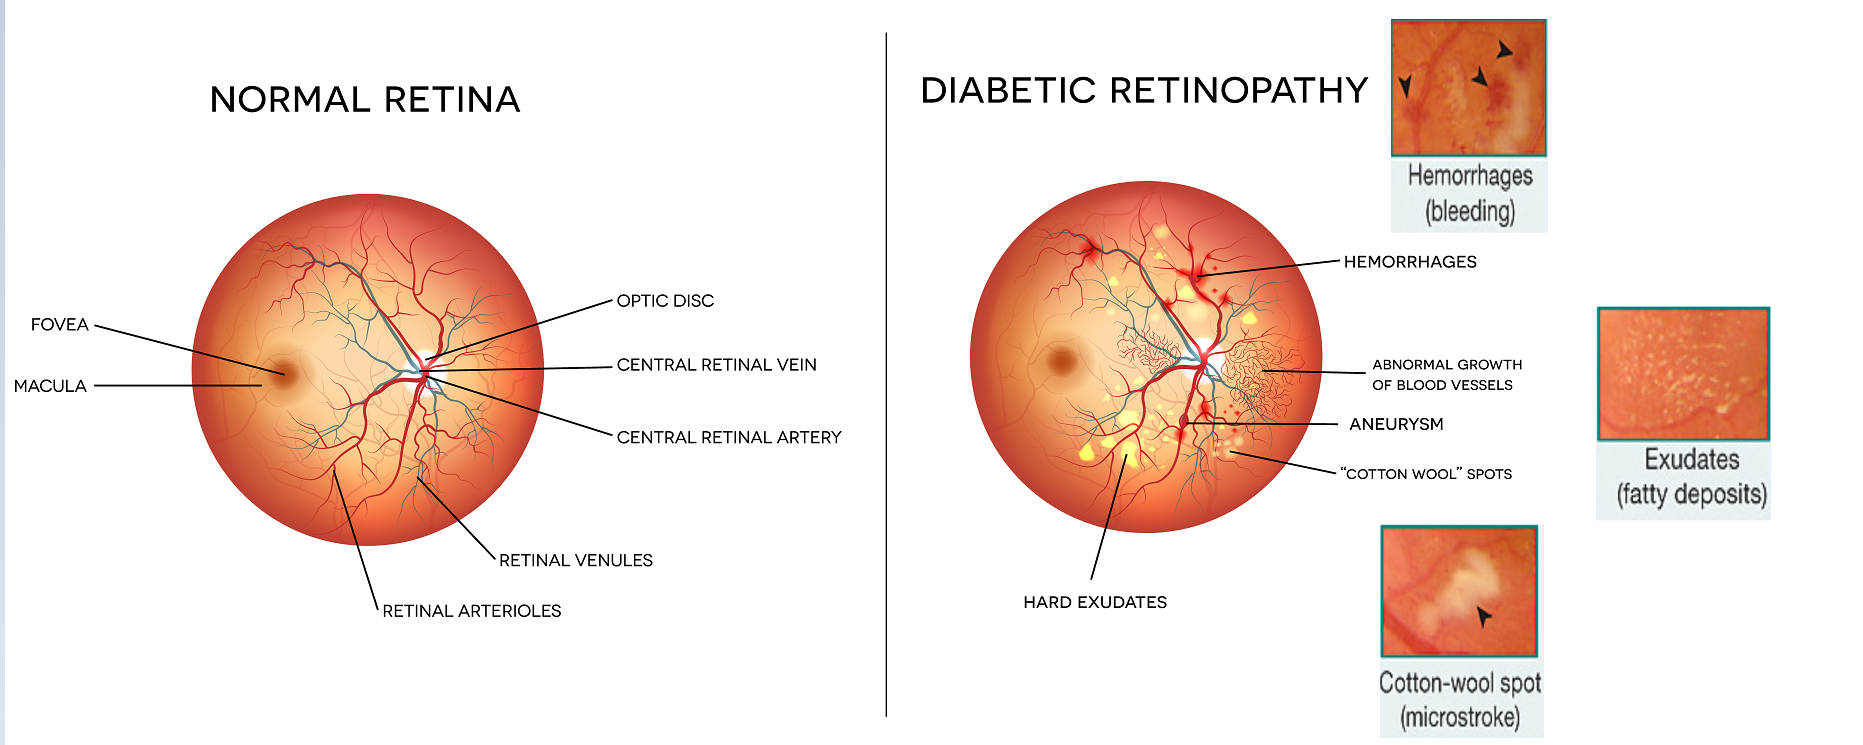

**Problem Statement:**

APTOS2019 has provided a large set of retina images taken using fundus photography under a variety of imaging conditions where we need to classify the severity of disease on a scale of 0 to 4. Some of the images are overexposed while some are underexposed and taken under different lighting conditions.


They want us to make automation of the prediction of severity of disease retinopathy basing upon retinal scanned images from a clinic.

A clinician has rated each image for the severity of diabetic retinopathy on a scale of 0 to 4:

It is a multi-class classification problem with 5 target classes [0,1,2,3,4]
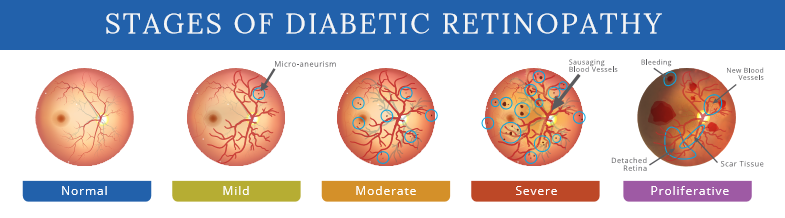

0 - No DR

1 - Mild

2 - Moderate

3 - Severe

4 - Proliferative DR

These are the 5 things to spot on the eyeball to know whether the patient has diabetic retinopathy or not.

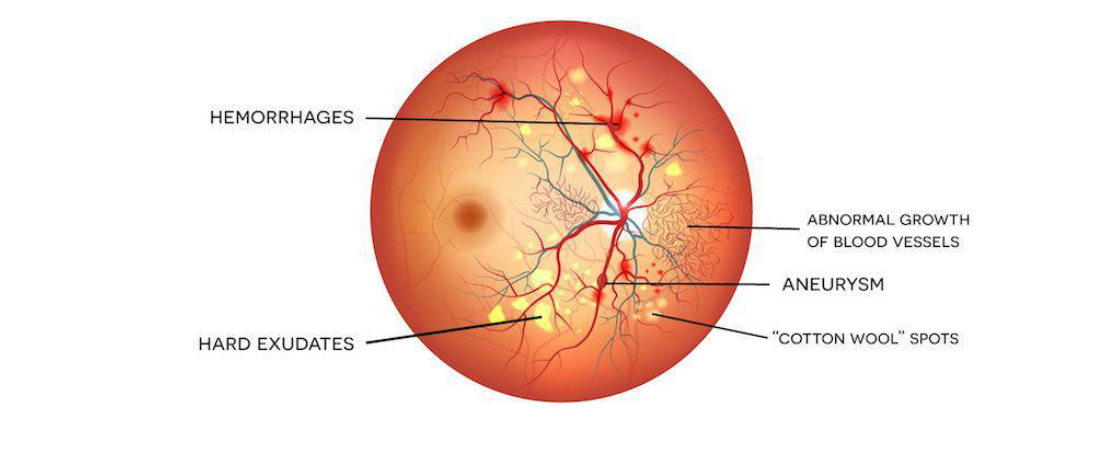

Read more about Disease Retinopathy [here](https://www.eyeops.com/contents/our-services/eye-diseases/diabetic-retinopathy).

# Data Preprocessing

## Importing data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/APTOS')

Mounted at /content/drive


In [ ]:
# !pip uninstall -y kaggle
# !pip install kaggle

In [ ]:
# import os
# os.environ["KAGGLE_USERNAME"] = "sivaakhilnukala"
# os.environ["KAGGLE_KEY"] = "f78ed35307f738a4aca77416cfe65d7b"

In [ ]:
# !kaggle competitions download -c aptos2019-blindness-detection

In [ ]:
# !unzip aptos2019-blindness-detection.zip

In [ ]:
ls

 aptos2019-blindness-detection.zip   sample_submission.csv   test_images/   train_images/
'Copy of Preprocessing_EDA.ipynb'    test.csv                train.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
import pandas.util.testing as tm
import cv2
from sklearn.model_selection import train_test_split
from PIL import Image

In [ ]:
train_data = pd.read_csv('train.csv')
print('train.csv:')
print("Number of Training images: {}\n".format(train_data.shape[0]))
print(train_data.head(),"\n")
test_data = pd.read_csv("test.csv")
print("test.csv: ")
print("Number of Testing images: {}\n".format(test_data.shape[0]))
print(test_data.head(), '\n')

print("sample_submission.csv:")
sample_submission = pd.read_csv("sample_submission.csv")
print("The format of submitting the final predictions on testing images: ")
print(sample_submission.head())

train.csv:
Number of Training images: 3662

        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0 

test.csv: 
Number of Testing images: 1928

        id_code
0  0005cfc8afb6
1  003f0afdcd15
2  006efc72b638
3  00836aaacf06
4  009245722fa4 

sample_submission.csv:
The format of submitting the final predictions on testing images: 
        id_code  diagnosis
0  0005cfc8afb6          0
1  003f0afdcd15          0
2  006efc72b638          0
3  00836aaacf06          0
4  009245722fa4          0


We have a total of 5 items:

* train.csv -> Contains two columns id_code (path of the training images) and diagnosis (target class)
* test.csv -> Contains one column id_code (path of the testing images) which we need to predict the class labels.
* train_images -> Folder containing the training images.
* test_images -> Folder containing the testing images.
* sample_submission.csv -> Contains the template of final submission file to the competition.

In [ ]:
# Intialization of variables which are useful for the later tasks.
img_width = 512
img_height = 512
no_channels = 3
split_size = 0.15
class_labels = {0: 'No DR[0]',1: 'Mild[1]', 2: 'Moderate[2]', 3: 'Severe[3]', 4: 'Proliferative DR[4]'}

Number of Images in train dataset:  3662
Number of Images in test dataset:  1928


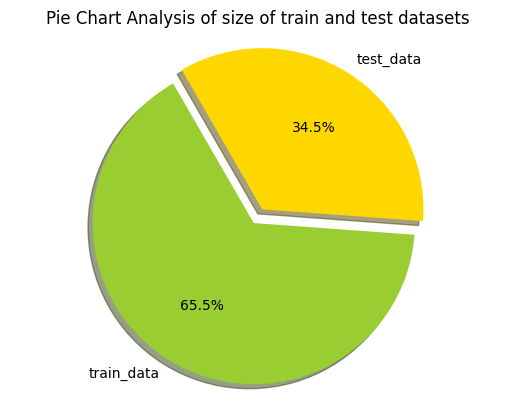

In [ ]:
data = [len(train_data), len(test_data)]
print("Number of Images in train dataset: ", data[0])
print("Number of Images in test dataset: ", data[1])
labels = ['train_data','test_data']
plt.pie(data,explode = [0,0.1], labels= labels, shadow = True, colors = ['yellowgreen','gold'],autopct='%1.1f%%', startangle = 120)
plt.title('Pie Chart Analysis of size of train and test datasets')
plt.axis('equal')
plt.show()

In [ ]:
class_labels_ = list(set(train_data['diagnosis']))
print("Target classes: {}".format(class_labels_))

Target classes: [0, 1, 2, 3, 4]


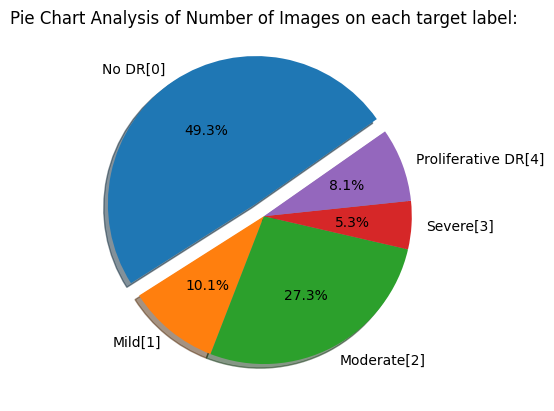

In [ ]:
class_sizes = []
for i in range(0,5):
    class_sizes.append(list(train_data['diagnosis']).count(i))
labels = class_labels.values()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','darkgreen']
plt.pie(class_sizes,explode = [0.1,0,0,0,0], labels= labels, shadow = True,autopct='%1.1f%%', startangle = 35)
plt.title('Pie Chart Analysis of Number of Images on each target label:')
plt.show()

* We can see that the data is heavily imbalanced. Their are ten times more images with No DR condition than the images with Severe condion.
* Adding class_weights may solve our problem.

In [ ]:
import os
types = []
images = []
for root, dirs, files in os.walk("train_images"):
  for file in files:
    if os.path.splitext(file)[1] not in types:
      print(os.path.splitext(file)[1])
      types.append(os.path.splitext(file)[1])
    images.append(os.path.splitext(file)[0])

print(len(images))

.png
3662


In [ ]:
import os
types = []
images = []
for root, dirs, files in os.walk("test_images"):
  for file in files:
    if os.path.splitext(file)[1] not in types:
      print(os.path.splitext(file)[1])
      types.append(os.path.splitext(file)[1])
    images.append(os.path.splitext(file)[0])

print(len(images))

.png
1928


In [ ]:
def image_analysis(dataframe, path):
    width_range = []
    height_range = []
    for i in range(dataframe.shape[0]):
        img = cv2.imread(f"{path}/{dataframe.iloc[i]['id_code']}.png")
        if len(np.array(img).shape) !=0:
          #print(i)
          height, width, _ = np.array(img).shape
          width_range.append(width)
          height_range.append(height)
    return width_range, height_range
width_range, height_range = image_analysis(train_data, 'train_images/')

In [ ]:
train_data.shape

(3662, 2)

In [ ]:
avg_width = sum(width_range)/len(width_range)
avg_height = sum(height_range)/len(height_range)
max_width = max(width_range)
max_height = max(height_range)
min_width = min(width_range)
min_height = min(height_range)
print("Average width of images in training set: {}".format(int(avg_width)))
print("Average height of images in training set: {}".format(int(avg_height)))
print("-"*100)
print("Maximum width of images in training set: {}".format(max_width))
print("Maximum height of images in training set: {}".format(max_height))
print("-"*100)
print("Minimum width of images in training set: {}".format(min_width))
print("Minimum height of images in training set: {}".format(min_height))

Average width of images in training set: 2015
Average height of images in training set: 1526
----------------------------------------------------------------------------------------------------
Maximum width of images in training set: 4288
Maximum height of images in training set: 2848
----------------------------------------------------------------------------------------------------
Minimum width of images in training set: 474
Minimum height of images in training set: 358


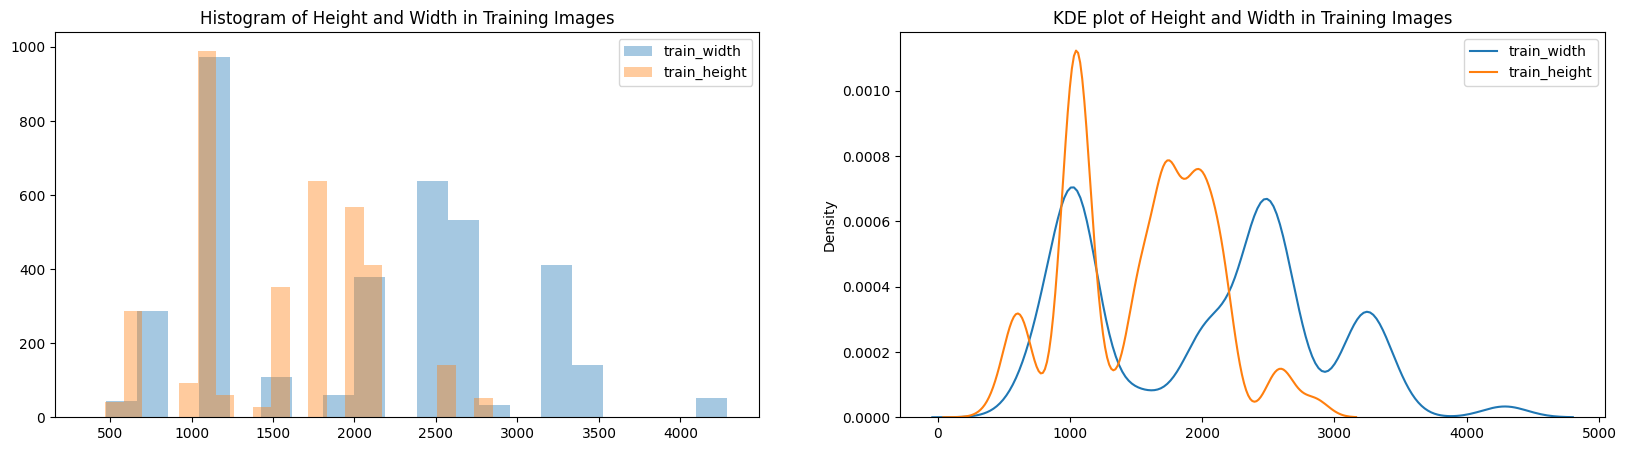

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.distplot(width_range, kde = False, label = 'train_width')
sns.distplot(height_range, kde = False, label = 'train_height')
plt.legend()
plt.title("Histogram of Height and Width in Training Images")
plt.subplot(1,2,2)
sns.kdeplot(width_range, label = 'train_width')
sns.kdeplot(height_range, label = 'train_height')
plt.legend()
plt.title('KDE plot of Height and Width in Training Images')
plt.show()

In [ ]:
width_range_test, height_range_test = image_analysis(test_data, 'test_images/')
avg_width = sum(width_range_test)/len(width_range_test)
avg_height = sum(height_range_test)/len(height_range_test)
max_width = max(width_range_test)
max_height = max(height_range_test)
min_width = min(width_range_test)
min_height = min(height_range_test)
print("Average width of images in training set: {}".format(int(avg_width)))
print("Average height of images in training set: {}".format(int(avg_height)))
print('-'*100)
print("Maximum width of images in test set: {}".format(max_width))
print("Maximum height of images in test set: {}".format(max_height))
print('-'*100)
print("Minimum width of images in test set: {}".format(min_width))
print("Minimum height of images in test set: {}".format(min_height))

Average width of images in training set: 1043
Average height of images in training set: 783
----------------------------------------------------------------------------------------------------
Maximum width of images in test set: 2896
Maximum height of images in test set: 1958
----------------------------------------------------------------------------------------------------
Minimum width of images in test set: 640
Minimum height of images in test set: 480


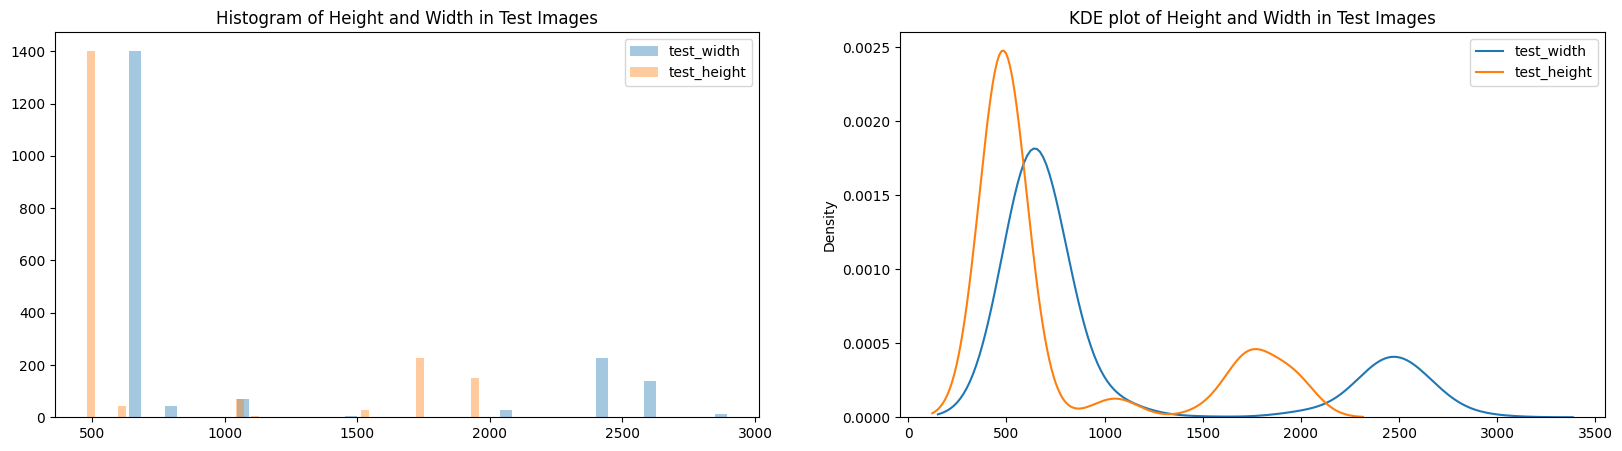

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.distplot(width_range_test, kde = False, label = 'test_width')
sns.distplot(height_range_test, kde = False, label = 'test_height')
plt.legend()
plt.title("Histogram of Height and Width in Test Images")
plt.subplot(1,2,2)
sns.kdeplot(width_range_test, label = 'test_width')
sns.kdeplot(height_range_test, label = 'test_height')
plt.legend()
plt.title('KDE plot of Height and Width in Test Images')
plt.show()

* We can see that their is no standard shape for images in both train and test datasets.
* TO run the models, we need to keep our data symmetric.

## Splitting the Dataset:

In [ ]:
train, val = train_test_split(train_data, stratify=train_data['diagnosis'].values, shuffle=True, test_size=0.15, random_state=340)

In [ ]:
train.to_csv('train_split.csv', index=False, header=True)
val.to_csv('val_split.csv', index=False, header=True)